In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# release-1.0.50

from fastai.text import *
import fastai; fastai.__version__

'1.0.50.post1'

In [2]:
bs = 5
path = untar_data(URLs.IMDB)

In [4]:
data_clas = (TextList.from_folder(path)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [5]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [5]:
learn = text_classifier_learner(data_clas, TransformerXL, drop_mult=0.5)

/home/R/fastai/fastai/text/learner.py:294: UserWarning: There are no pretrained weights for that architecture yet!
  warn("There are no pretrained weights for that architecture yet!")


In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


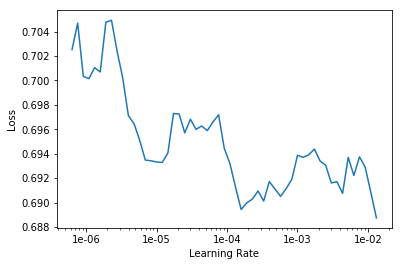

In [8]:
learn.recorder.plot(skip_end=30)

In [9]:
learn.fit_one_cycle(1, 5e-4, div_factor=5)

epoch,train_loss,valid_loss,accuracy,time
0,0.692548,0.761547,0.500000,32:52


In [ ]:
# awd-lstm

epoch,train_loss,valid_loss,accuracy
1,0.310078,0.197204,0.926960


In [ ]:
# learn.save('first')

# learn.load('first');

# learn.predict("I really loved that movie, it was awesome!")